# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | hirara
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | wayne
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | sechura
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | ola
Processing Record 11 of Set 1 | ifakara
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | san pedro pochutla
Processing Record 14 of Set 1 | datong
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | brookings
Processing Record 18 of Set 1 | flin flon
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | mweka
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | mikuni
Processing Record 

Processing Record 38 of Set 4 | kalkandere
Processing Record 39 of Set 4 | wailua homesteads
Processing Record 40 of Set 4 | teknaf
Processing Record 41 of Set 4 | tazovsky
Processing Record 42 of Set 4 | zavidovo
Processing Record 43 of Set 4 | igarka
Processing Record 44 of Set 4 | sao gabriel da cachoeira
Processing Record 45 of Set 4 | arno
Processing Record 46 of Set 4 | jamestown
Processing Record 47 of Set 4 | xinyuan
Processing Record 48 of Set 4 | qarauyl
Processing Record 49 of Set 4 | visakhapatnam
Processing Record 0 of Set 5 | kunming
Processing Record 1 of Set 5 | santona
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | kongsvinger
Processing Record 4 of Set 5 | holualoa
Processing Record 5 of Set 5 | znamenskoye
Processing Record 6 of Set 5 | la passe
Processing Record 7 of Set 5 | lagoa santa
Processing Record 8 of Set 5 | 'ibri
City not found. Skipping...
Processing Record 9 of Set 5 | teterow
Processing Record 10 of Set 5 | trindade
Processin

Processing Record 27 of Set 8 | chehalis
Processing Record 28 of Set 8 | lompoc
Processing Record 29 of Set 8 | villamontes
Processing Record 30 of Set 8 | poronaysk
Processing Record 31 of Set 8 | uthal
Processing Record 32 of Set 8 | ephrata
Processing Record 33 of Set 8 | phan thiet
Processing Record 34 of Set 8 | lahad datu
Processing Record 35 of Set 8 | huntingdon
Processing Record 36 of Set 8 | dunedin
Processing Record 37 of Set 8 | el granada
Processing Record 38 of Set 8 | mournies
Processing Record 39 of Set 8 | kapa'a
Processing Record 40 of Set 8 | conception bay south
Processing Record 41 of Set 8 | mossel bay
Processing Record 42 of Set 8 | patong
Processing Record 43 of Set 8 | el calafate
Processing Record 44 of Set 8 | kokpekty
Processing Record 45 of Set 8 | codrington
Processing Record 46 of Set 8 | georgiyevka
Processing Record 47 of Set 8 | maintirano
Processing Record 48 of Set 8 | collie
Processing Record 49 of Set 8 | fada
Processing Record 0 of Set 9 | kidal
P

Processing Record 19 of Set 12 | at taj
Processing Record 20 of Set 12 | roslavl'
Processing Record 21 of Set 12 | berezovyy
Processing Record 22 of Set 12 | pont-l'abbe
City not found. Skipping...
Processing Record 23 of Set 12 | rauma
Processing Record 24 of Set 12 | mar del plata
Processing Record 25 of Set 12 | fort bragg
Processing Record 26 of Set 12 | sao tome
Processing Record 27 of Set 12 | altay
Processing Record 28 of Set 12 | dolinsk
Processing Record 29 of Set 12 | saurimo
Processing Record 30 of Set 12 | dondo
Processing Record 31 of Set 12 | galveston
Processing Record 32 of Set 12 | arawa
Processing Record 33 of Set 12 | kramators'k
Processing Record 34 of Set 12 | matoury
Processing Record 35 of Set 12 | kristiansund
Processing Record 36 of Set 12 | apodi
Processing Record 37 of Set 12 | socorro
Processing Record 38 of Set 12 | titabar
Processing Record 39 of Set 12 | balabac
Processing Record 40 of Set 12 | sishilichengzi
City not found. Skipping...
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,8.55,72,90,4.45,CL,1689397829
1,bilibino,68.0546,166.4372,27.43,31,25,5.04,RU,1689397829
2,hirara,24.8000,125.2833,34.15,62,75,7.72,JP,1689397830
3,grytviken,-54.2811,-36.5092,-3.75,72,2,3.30,GS,1689397830
4,wayne,42.2506,-83.2833,23.30,88,100,5.14,US,1689397830


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,8.55,72,90,4.45,CL,1689397829
1,bilibino,68.0546,166.4372,27.43,31,25,5.04,RU,1689397829
2,hirara,24.8000,125.2833,34.15,62,75,7.72,JP,1689397830
3,grytviken,-54.2811,-36.5092,-3.75,72,2,3.30,GS,1689397830
4,wayne,42.2506,-83.2833,23.30,88,100,5.14,US,1689397830


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

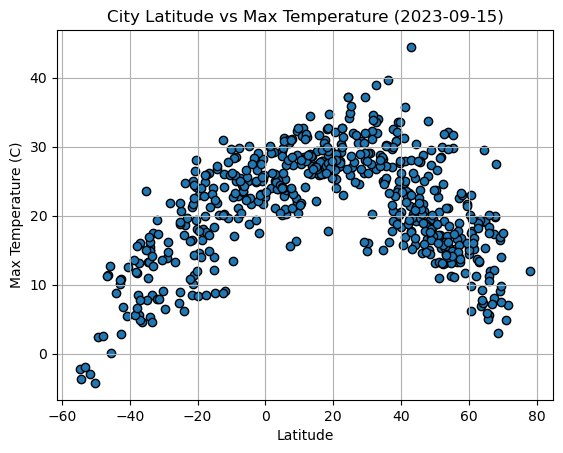

In [31]:
# Build scatter plot for latitude vs. temperature
x_values = [data['Lat'] for data in city_data]
y_values = [data['Max Temp'] for data in city_data]
plt.scatter(x_values,y_values,edgecolor='black')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title('City Latitude vs Max Temperature (2023-09-15)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

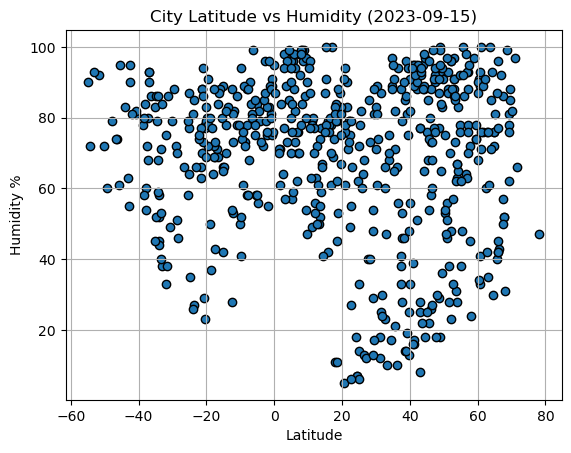

In [32]:
# Build the scatter plots for latitude vs. humidity
x_values = [data['Lat'] for data in city_data]
y_values = [data['Humidity'] for data in city_data]
plt.scatter(x_values,y_values,edgecolor='black')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title('City Latitude vs Humidity (2023-09-15)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

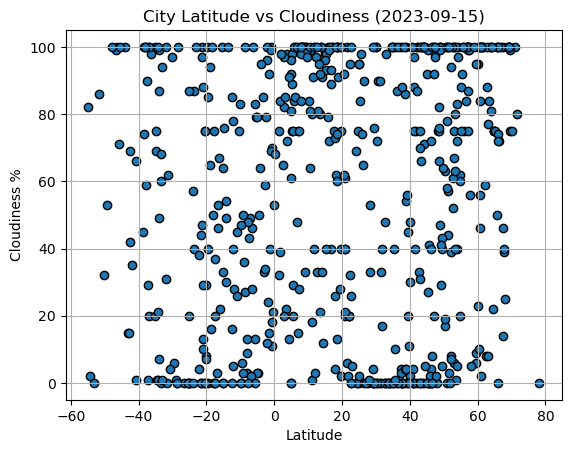

In [33]:
# Build the scatter plots for latitude vs. cloudiness
x_values = [data['Lat'] for data in city_data]
y_values = [data['Cloudiness'] for data in city_data]
plt.scatter(x_values,y_values,edgecolor='black')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title('City Latitude vs Cloudiness (2023-09-15)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

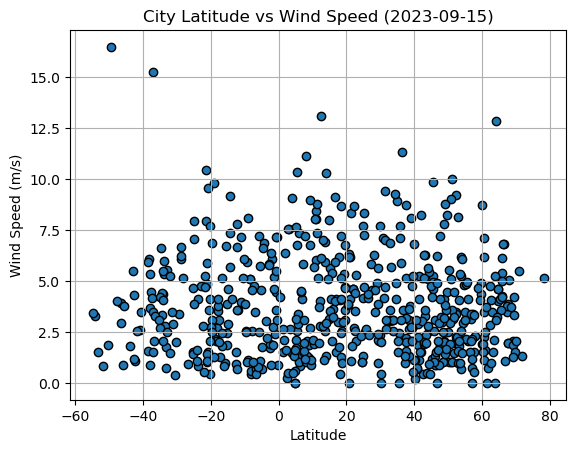

In [34]:
# Build the scatter plots for latitude vs. wind speed
x_values = [data['Lat'] for data in city_data]
y_values = [data['Wind Speed'] for data in city_data]
plt.scatter(x_values,y_values,edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title('City Latitude vs Wind Speed (2023-09-15)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, hemisphere, x_coord=0.1, y_coord=0.9):
    # Perform linear regression
    slope, intercept, r_value, p_value, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor='black')
    plt.plot(x_values, regress_values, color='red')

    #Annotate the linear regression equation on the plot
    plt.annotate(equation, (x_coord, y_coord), xycoords='axes fraction', fontsize=14, color='red')
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere: {y_label} vs. {x_label}")
   
    # Return the r-value
    return r_value

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,27.43,31,25,5.04,RU,1689397829
2,hirara,24.8000,125.2833,34.15,62,75,7.72,JP,1689397830
4,wayne,42.2506,-83.2833,23.30,88,100,5.14,US,1689397830
8,ilulissat,69.2167,-51.1000,9.01,81,100,2.06,GL,1689397832
9,ola,59.5833,151.2833,21.75,74,9,4.93,RU,1689397832


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,8.55,72,90,4.45,CL,1689397829
3,grytviken,-54.2811,-36.5092,-3.75,72,2,3.30,GS,1689397830
5,east london,-33.0153,27.9116,17.44,38,94,5.54,ZA,1689397830
6,sechura,-5.5569,-80.8222,22.61,75,13,5.76,PE,1689397831
7,port-aux-francais,-49.3500,70.2167,2.39,60,53,16.50,TF,1689397831


###  Temperature vs. Latitude Linear Regression Plot

 The r_value is: -0.6176597961099386


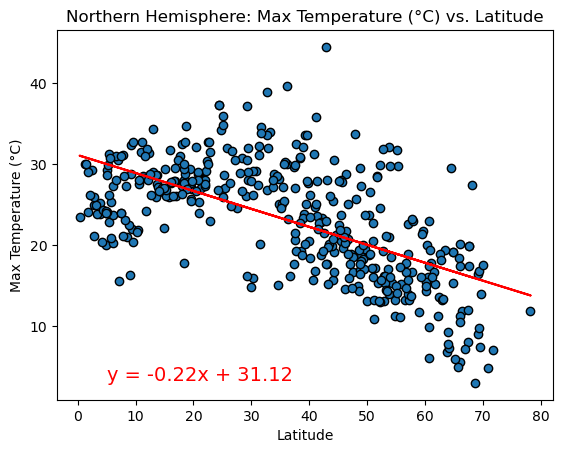

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

r_value=create_linear_regression_plot(x_values, y_values, 'Latitude', 'Max Temperature (°C)', 'Northern', x_coord=0.1, y_coord=0.05)

print(f" The r_value is: {r_value}")

# Show the plot
plt.show()

 The r_value is: 0.7858186511327542


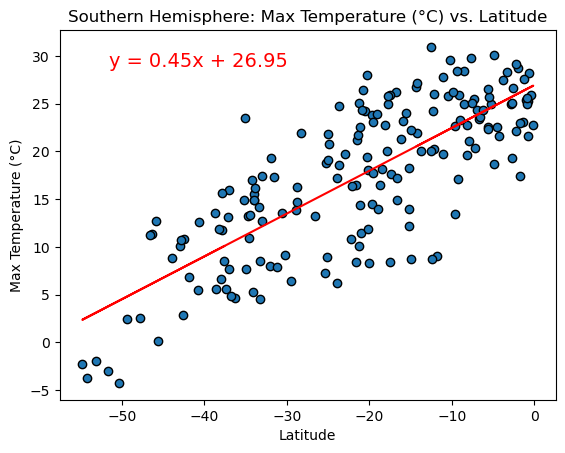

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

r_value=create_linear_regression_plot(x_values, y_values, 'Latitude', 'Max Temperature (°C)', 'Southern')

print(f" The r_value is: {r_value}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** There appears to be a noticeable correlation between the latitide and temperature in both the Northern and Southern hemisphere regression plots.  Latitudes closer to the equator (latitude of zero) display higher temperatures and as the latitude moves away from the equator the temperature decreases.  Note there could be other factors influencing temperature, such as height above sea level.

### Humidity vs. Latitude Linear Regression Plot

 The r_value is: -0.05250075371586771


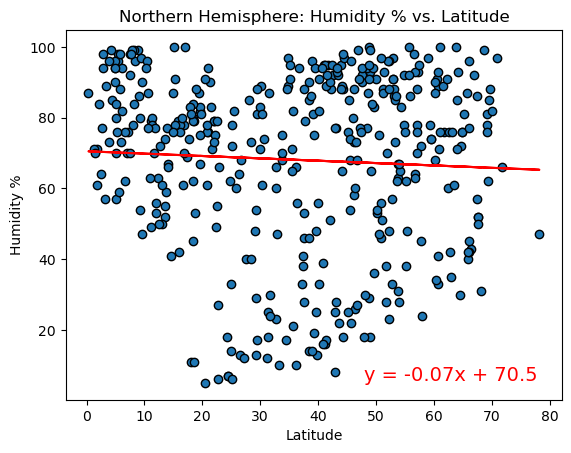

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

r_value=create_linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity %', 'Northern', x_coord=0.6, y_coord=0.05)

print(f" The r_value is: {r_value}")

# Show the plot
plt.show()

 The r_value is: 0.10527758673371394


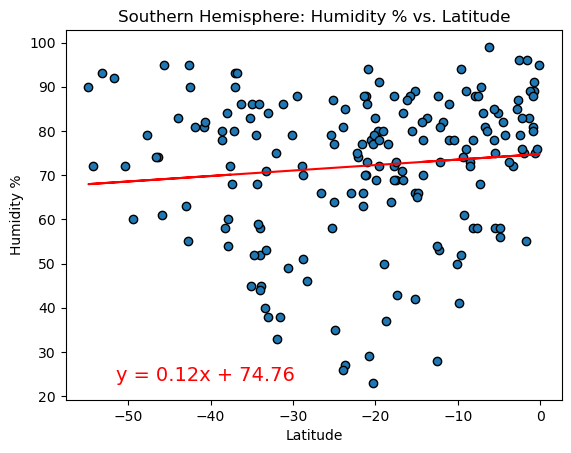

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

r_value=create_linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity %', 'Southern', x_coord=0.1, y_coord=0.05)

print(f" The r_value is: {r_value}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** The r values of -0.052 and -0.105 in the humidity vs latitude regression plots indicate a weak correlation between these 2 measurements.  The fact that both the Northern and Southern calculations are both negative also supports this lack of correlation.

### Cloudiness vs. Latitude Linear Regression Plot

 The r_value is: -0.00958592201423354


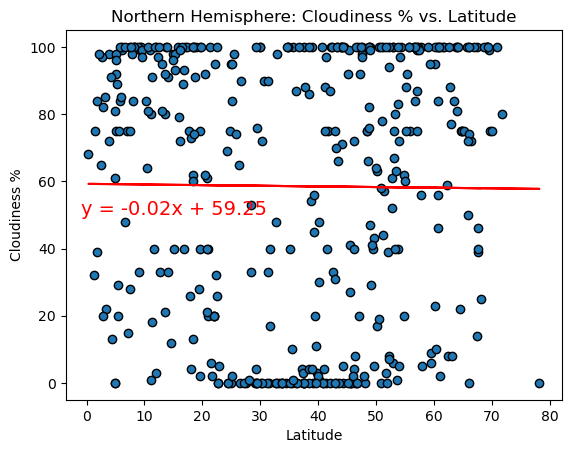

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

r_value=create_linear_regression_plot(x_values, y_values, 'Latitude', 'Cloudiness %', 'Northern', x_coord=0.03, y_coord=0.5)

print(f" The r_value is: {r_value}")

# Show the plot
plt.show()

 The r_value is: -0.10288221566534599


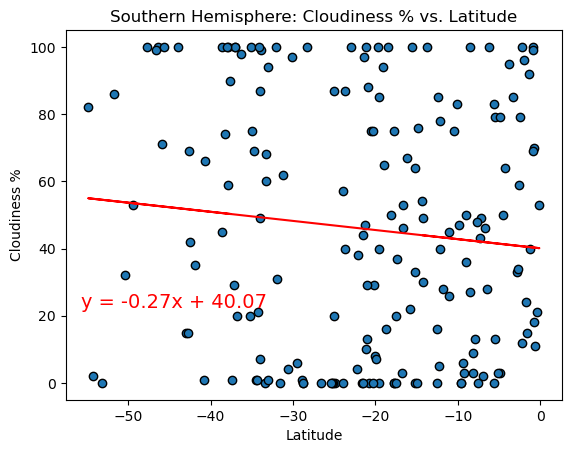

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

r_value=create_linear_regression_plot(x_values, y_values, 'Latitude', 'Cloudiness %', 'Southern', x_coord=0.03, y_coord=0.25)

print(f" The r_value is: {r_value}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** The r values of -0.009 and -0.102 in the cloudiness vs latitude regression plots indicate a weak correlation between these 2 measurements.  The fact that both the Northern and Southern calculations are both negative also supports this lack of correlation.

### Wind Speed vs. Latitude Linear Regression Plot

 The r_value is: -0.10084280745169157


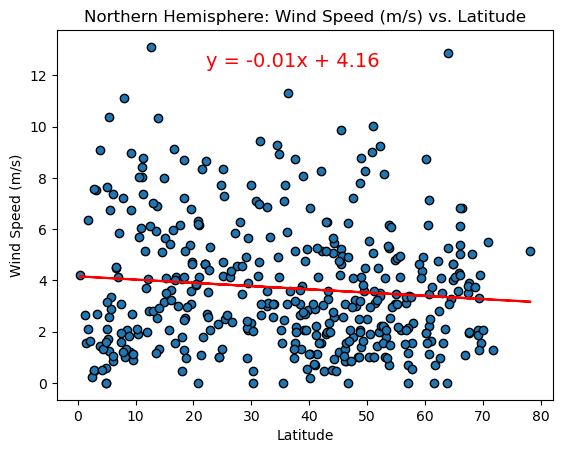

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

r_value=create_linear_regression_plot(x_values, y_values, 'Latitude', 'Wind Speed (m/s)', 'Northern', x_coord=0.3, y_coord=0.9)

print(f" The r_value is: {r_value}")

# Show the plot
plt.show()

 The r_value is: -0.012044128527820688


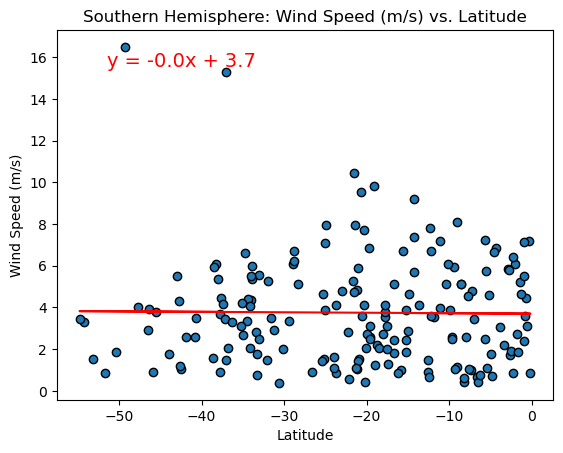

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

r_value=create_linear_regression_plot(x_values, y_values, 'Latitude', 'Wind Speed (m/s)', 'Southern')

print(f" The r_value is: {r_value}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** The r values of -0.100 and -0.012 in the cloudiness vs latitude regression plots indicate a weak correlation between these 2 measurements.  The fact that both the Northern and Southern calculations are both negative also supports this lack of correlation.